# Anomaly Detection Notebook 2/2

This notebook is part of a set, along with [`cm-exploration.ipynb`](https://nbviewer.jupyter.org/github/anomaly-work-alone/project_anomaly_detection_curriculum/blob/main/cm-exploration.ipynb), maintained by Ray Zapata of the _Anomaly Work Alone_ analyst team. Due to the rough, incomplete nature of this notebook, please view [`anomaly_report.ipynb`](https://nbviewer.jupyter.org/github/anomaly-work-alone/project_anomaly_detection_curriculum/blob/main/anomaly_report.ipynb) for full report of questions made of this data.

**Initialize Notebook**

In [1]:
# import standard libraries
import numpy as np
import pandas as pd

# import vissualization
import matplotlib.pyplot as plt
import seaborn as sns

# import wrangle function
from wrangle import wrangle_curriculum

# cosmetic settings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import style
style.use('~/.matplotlib/gruvbox.mplstyle')

In [2]:
# obtain datafram from acquire function
df = wrangle_curriculum()
# remove staff from the dataframe
df = df[df.cohort_name != 'Staff']

In [3]:
# view dimensions
df.shape

(921856, 8)

In [4]:
# view first five rows
df.head()

,endpoint,user_id,cohort_id,source_ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 921856 entries, 2018-01-26 to 2021-07-15
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   endpoint     921855 non-null  object        
 1   user_id      921856 non-null  int64         
 2   cohort_id    868359 non-null  float64       
 3   source_ip    921856 non-null  object        
 4   cohort_name  857359 non-null  object        
 5   start_date   857359 non-null  datetime64[ns]
 6   end_date     857359 non-null  datetime64[ns]
 7   program_id   857359 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 63.3+ MB


## Question 3

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [6]:
# subset data for access between student active dates
active_dates_df = df[(df.index >= df.start_date) & (df.index <= df.end_date)]
# group user id to find total page loads
active_access_df = active_dates_df.groupby(['cohort_name', 'user_id']).count()
# sort values by endpoint counts and pull carried over data from index
active_access_df = active_access_df.sort_values('endpoint').reset_index()[['user_id', 'cohort_name', 'endpoint']]
# find users who were less than 1% of the max access
one_percent_access = active_access_df[active_access_df.endpoint < active_access_df.endpoint.max() * .01]

In [7]:
# create list of user_id with access less than 1%
one_percent_access = one_percent_access.user_id.to_list()
# filter DataFrame for only users in the less than 1% acccess list
one_percent_access_df = active_dates_df[active_dates_df.user_id.isin(one_percent_access) == True]
print(one_percent_access, '| User Count:', len(one_percent_access))

[879, 940, 619, 918, 832, 663, 278, 539, 956, 895, 812, 388, 679, 941, 572, 697, 889, 487, 340, 49, 64, 24, 772, 41, 529, 371] | User Count: 26


In [8]:
one_percent_access_df.groupby(['user_id', 'cohort_name']).count()

,,endpoint,cohort_id,source_ip,start_date,end_date,program_id
user_id,cohort_name,,,,,,
24,Sequoia,26,26,26,26,26,26
41,Sequoia,28,28,28,28,28,28
49,Sequoia,25,25,25,25,25,25
64,Europa,25,25,25,25,25,25
278,Voyageurs,4,4,4,4,4,4
340,Zion,18,18,18,18,18,18
371,Yosemite,42,42,42,42,42,42
388,Andromeda,8,8,8,8,8,8
487,Bayes,17,17,17,17,17,17


In [9]:
# remove anomalous users from list
one_percent_access.remove(663)
one_percent_access.remove(895)
# create new columns for boolean when user in low_access
df['low_active_access'] = np.where(df.user_id.isin(one_percent_access) == True, 1, 0)

**Takeaways**

There are $26$ explicitly non-staff users whose sum access of any curriculum pages was less than $1\%$ of the highest user access, which was approximately $48$ total page loads. Two of these users, `user_id` $663$ and $895$ have access histories as members of two cohorts, where one count of traffic more expected of an active student. Having been part of the Florence cohort, there are no _students_ in the cohort, to my knowledge, who participated in two programs simultaneously. These two are either the result of user group misplacement or belong to staff-use, student level users for troubleshooting student access problems.

For the remainder of the users in the list, a new column called `low_active_access` is appended to the DataFrame to grab details about their use and traffic for any further questions.

## Question 4

Is there any suspicious activity, such as users/machines/etc accessing the curriculum who should not be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [10]:
# verify if there is access from null users
df[df.user_id.isna() == True]

,endpoint,user_id,cohort_id,source_ip,cohort_name,start_date,end_date,program_id,low_active_access
date,,,,,,,,,


In [11]:
# verify if there is access from non-cohort users
df[df.cohort_id.isna() == True]

,endpoint,user_id,cohort_id,source_ip,cohort_name,start_date,end_date,program_id,low_active_access
date,,,,,,,,,
2018-01-26,/,48,NaN,97.105.19.61,NaN,NaT,NaT,NaN,0
2018-01-26,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,NaT,NaT,NaN,0
2018-01-26,/,48,NaN,97.105.19.61,NaN,NaT,NaT,NaN,0
2018-01-26,/,48,NaN,97.105.19.61,NaN,NaT,NaT,NaN,0
2018-01-26,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,NaT,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...
2021-07-12,java-i/syntax-types-and-variables,810,NaN,162.92.128.83,NaN,NaT,NaT,NaN,0
2021-07-13,/,727,NaN,172.58.96.119,NaN,NaT,NaT,NaN,0
2021-07-13,/,728,NaN,70.130.121.144,NaN,NaT,NaT,NaN,0


In [12]:
# check if there is a difference in total traffic for users
# who have known cohorts and those who do not

# resample to daily traffic and store preserved ip and user in index
unknowns_df = df[df.cohort_id.isna() == True].groupby(['user_id', 'source_ip'])\
                                             .endpoint.count()
knowns_df = df[df.cohort_id.isna() == False].groupby(['user_id', 'source_ip'])\
                                             .endpoint.count()
# pull variables out from index
unknowns_df = unknowns_df.reset_index()
knowns_df = knowns_df.reset_index()

In [13]:
# get first and third quartile for endpoint counts per user
q1, q3 = df.groupby('user_id').endpoint.count().quantile([0.25, 0.75])
# do math to get IQR
iqr = q3 - q1
# establish upper bound for plotting and filtering
upper_bound = q3 + 1.5 * iqr

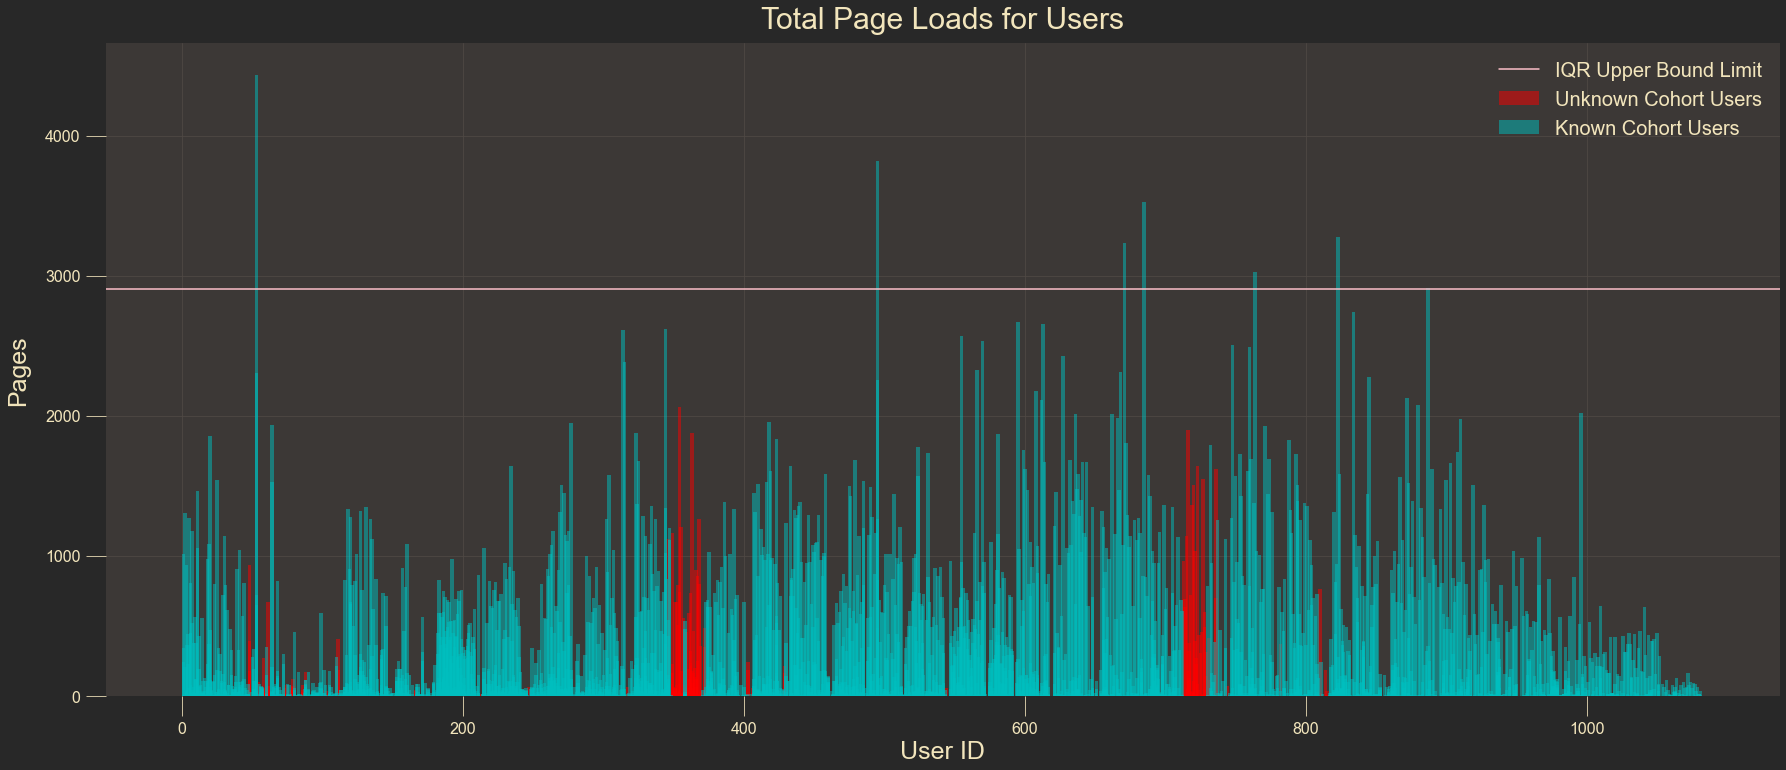

In [14]:
# create figure, axes
fig, ax = plt.subplots(figsize=(30,12))
# plot unknown users
ax.bar(unknowns_df.user_id,
       unknowns_df.endpoint,
       width=2.5,
       color='r', 
       alpha=0.5,
       label='Unknown Cohort Users')
# plot users with known cohort
ax.bar(knowns_df.user_id,
       knowns_df.endpoint,
       width=2.5,
       color='c',
       alpha=0.5,
       label='Known Cohort Users')
# plot ceiling for upper bound outliers
ax.axhline(y=upper_bound,
           label='IQR Upper Bound Limit',
           c='pink')
# set axis parameters
ax.tick_params(size=20, pad=5)
ax.set_xlabel('User ID', fontsize=25,)
ax.set_ylabel('Pages', fontsize=25, labelpad=15)
# increase legend fontsize
ax.legend(fontsize=20)
# create title
plt.title('Total Page Loads for Users', fontsize=30, pad=15)
# bring the pain
plt.show()

In [15]:
# create list of outlier users as plotted above
outlier_users = knowns_df[knowns_df.endpoint >= upper_bound].user_id.to_list()
# print list and count of users
print(outlier_users, ' User Count:', len(outlier_users), '\n')
# apply list to filter data from DataFrame
outlier_users_df = df[df.user_id.isin(outlier_users) == True]
# ouput DataFrame preview
outlier_users_df

[53, 495, 671, 685, 764, 823, 887]  User Count: 7 



,endpoint,user_id,cohort_id,source_ip,cohort_name,start_date,end_date,program_id,low_active_access
date,,,,,,,,,
2018-01-28,index.html,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0,0
2018-01-28,html-css,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0,0
2018-01-28,javascript-i,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0,0
2018-01-28,javascript-i/conditionals,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0,0
2018-01-28,javascript-i/conditionals,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0,0
...,...,...,...,...,...,...,...,...,...
2021-07-15,/,823,134.0,66.196.21.182,Luna,2020-12-07,2021-06-08,2.0,0
2021-07-15,java-ii,823,134.0,66.196.21.182,Luna,2020-12-07,2021-06-08,2.0,0
2021-07-15,java-i,823,134.0,66.196.21.182,Luna,2020-12-07,2021-06-08,2.0,0


**Takeaways**

Attempting to see if there was a difference in traffic from users with and without known cohorts resulted in clearly seeing that the users without known cohorts were fewer than the sum of cohort users and had traffic not dissimilar from other users. Looking instead at all user traffic to find atypical traffic within short time frames might be more useful in answering the question.

In [16]:
# create DataFrame of daily traffic per user
daily_traffic = df.groupby('user_id').resample('D').endpoint.count()
# pull user_id out of index and reset as data
daily_traffic = daily_traffic.reset_index().set_index('date')

In [17]:
# get q1 and q3 for hourly traffic counts, excluding 0
q1, q3 = daily_traffic[daily_traffic.endpoint > 0]\
                       .endpoint.quantile([0.25, 0.75])
# do math to get IQR
iqr = q3 - q1
# establish upper bound
upper_bound = q3 + 5 * iqr

In [18]:
# assign outliers in daily traffic to DataFrame
daily_traffic_outliers = daily_traffic[daily_traffic.endpoint > upper_bound]

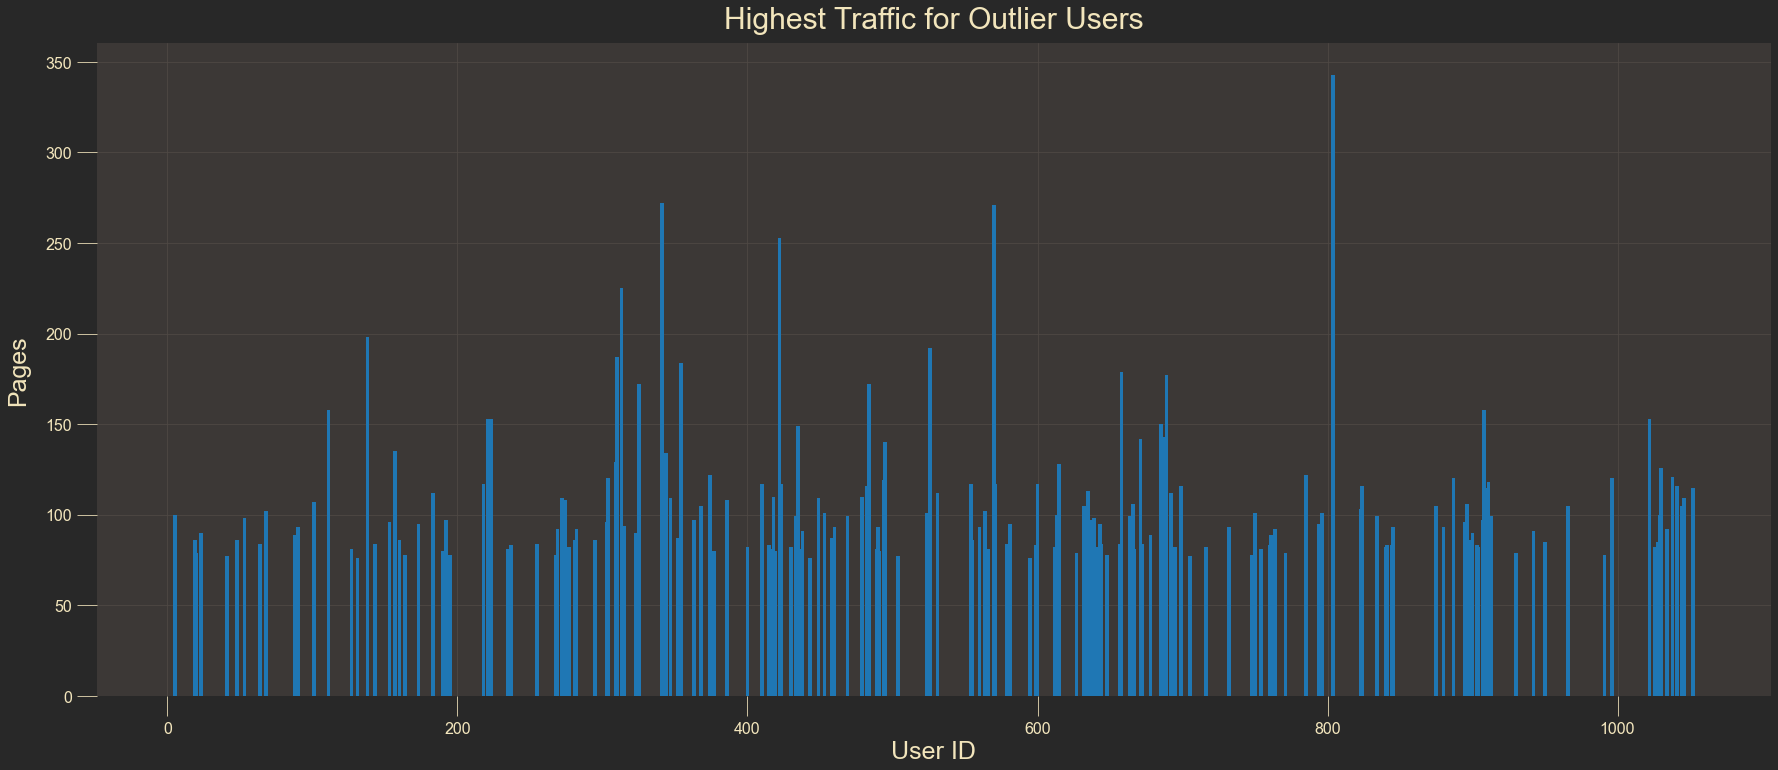

In [19]:
# create figure, axes
fig, ax = plt.subplots(figsize=(30,12))
# plot outliers to visualize disparity
ax.bar(daily_traffic_outliers.user_id,
       daily_traffic_outliers.endpoint,
       width=2.5)
# set axis parameters
ax.tick_params(size=20, pad=5)
ax.set_xlabel('User ID', fontsize=25,)
ax.set_ylabel('Pages', fontsize=25, labelpad=15)
# create title
plt.title('Highest Traffic for Outlier Users', fontsize=30, pad=15)
# plot that plot
plt.show()

In [20]:
# find outliers of the outliers
daily_traffic_outliers[daily_traffic_outliers.endpoint > 200]

,user_id,endpoint
date,,
2018-12-19,313,225
2019-03-03,341,272
2019-07-25,422,253
2020-04-05,570,232
2020-04-16,570,271
2020-04-26,570,234
2021-06-21,804,343


**Additional Takeaways**

Even among the outliers for daily traffic per user, there are further extreme outliers. Specifically, `user_id` $570$ has surpassed the extreme of $230$ pages in a single day three times in the same month. Even if there is a lesson that requires web scraping practices, this user has significantly surpassed any other student's access frequency. There is unlikely a legitimate reason for a student to be doing this as frequently and to the degree that is done.

## Question 5

At some point in 2019, the ability for students and alumni to access both curricula should have been shut off. Do you see any evidence of that happening? Did it happen before?

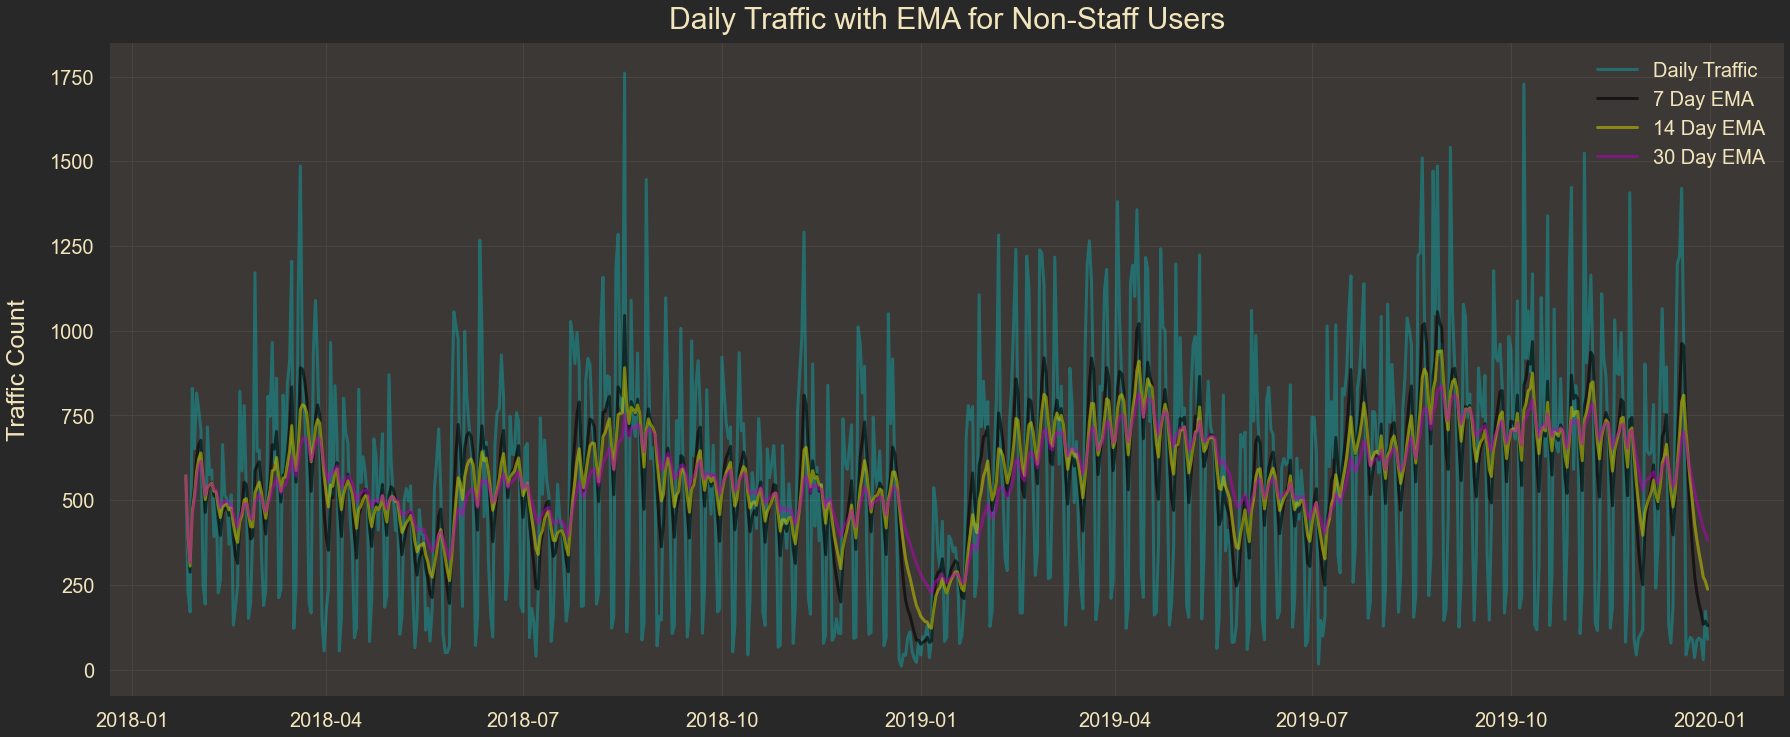

In [21]:
# resample data to daily endpoint counts
daily_df = df.resample('D').endpoint.count()[:'2019']
# create figure, axes
fig, ax = plt.subplots(figsize=(30,12))
# plot daily traffic
ax.plot(daily_df,
        c='c',
        alpha=0.4,
        linewidth=3,
        label='Daily Traffic')
# plot exp moving avg as 7 days for traffic
ax.plot(daily_df.ewm(span=7).mean(),
        color='k',
        alpha=0.6,
        linewidth=3,
        label='7 Day EMA')
# plot exp moving avg as 14 days for traffic
ax.plot(daily_df.ewm(span=14).mean(),
        color='y',
        alpha=0.6,
        linewidth=3,
        label='14 Day EMA')
# plot exp moving avg as 30 days for traffic
ax.plot(daily_df.ewm(span=30).mean(),
        color='m',
        alpha=0.5,
        linewidth=3,
        label='30 Day EMA')
# set axis parameters
plt.tick_params(labelsize=20, pad=15)
ax.set_xlabel('', labelpad=15)
ax.set_ylabel('Traffic Count', fontsize=25, labelpad=20)
# display legend and change fontsize
ax.legend(fontsize=20)
# create plot title
plt.title('Daily Traffic with EMA for Non-Staff Users', fontsize=30, pad=15)
# make all the above effort worth it
plt.show()

In [22]:
# list of start, end date cols
date_cols = ['start_date', 'end_date']
# create variable to filter dataframe to cohort start dates in 2018, 2019
date_subset = (df.start_date > '2018') & (df.start_date < '2020')
# output DataFrame of matching start and ends dates
df[date_cols][date_subset].groupby(date_cols).sum()

,
start_date,end_date
2018-01-08,2018-05-17
2018-03-05,2018-07-19
2018-05-29,2018-10-11
2018-07-23,2018-11-29
2018-09-17,2019-02-08
2018-11-05,2019-04-03
2019-01-22,2019-06-04
2019-03-18,2019-07-30
2019-05-28,2019-10-08


**Takeaways**

There does not appear to be any significant difference in traffic patterns from $2019$ to the previous year; however, there is data missing from the first weeks of the year in Jan $2018$, so it is possible that the dip in that same time frame during $2019$ may be result of bi-curriculum access being terminated. There are two active cohorts during that period, with at least two weeks remaining, and a new one begins around the period when traffic begins to surge up in late Jan $2019$. With no other factors to explain the decrease, it warrants looking into for further information if so desired.